# Trials notebook
Notebook for trying out image processing tools and experimenting with potential additions to GUI image tool project. 

In [1]:
from skimage.segmentation import slic
from skimage.color import label2rgb, rgb2gray
from skimage.filters import threshold_local
from skimage import measure
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def show_image(image_data):
    plt.imshow(image_data)
    plt.xticks([]), plt.yticks([])
    plt.show
    
def switch_channels(img_data):
        """Switch red and blue color channels for displaying proper colors"""
        intensity_channels = np.moveaxis(img_data, -1, 0) #move axis for easy reordering
        reordered_intensity_channels = [intensity_channels[2], intensity_channels[1], intensity_channels[0]]
        switched_image = np.moveaxis(np.array((reordered_intensity_channels), dtype=np.uint8), 0, -1)
        return switched_image

#### get superpixel segments

In [3]:
fish_image = cv2.imread('fish.jpg')
segments = slic(fish_image, n_segments = 255)

In [4]:
segmented_image = label2rgb(segments, fish_image, kind='avg')

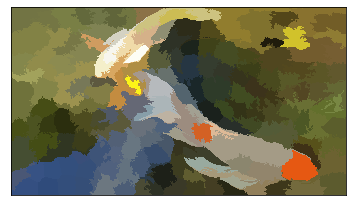

In [5]:
show_image(switch_channels(segmented_image))

#### get image contours

In [6]:
grey_img = rgb2gray(cv2.imread('fish.jpg'))
threshold = threshold_local(grey_img, 501)
binary_img = np.array(grey_img > threshold)

contours = measure.find_contours(binary_img, 0.8)

In [7]:
contours[0].shape

(6, 2)

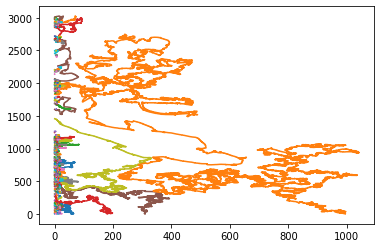

In [8]:
#plot first 500 contours 
for contour in contours[:500]:
    points = contour
    x_values = [point[0] for point in points]
    y_values = [point[1] for point in points]
    
    plt.plot(x_values, y_values)
    
plt.show()